# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [1]:
# imports
import numpy as np
import pandas as pd
#import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import tree

In [2]:
dataset = pd.read_excel(r'Concrete_Data.xls')
print(dataset)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [3]:
print(dataset.isnull().sum().sort_values(ascending=False))

Concrete compressive strength(MPa, megapascals)          0
Age (day)                                                0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Water  (component 4)(kg in a m^3 mixture)                0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Cement (component 1)(kg in a m^3 mixture)                0
dtype: int64


In [4]:
dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


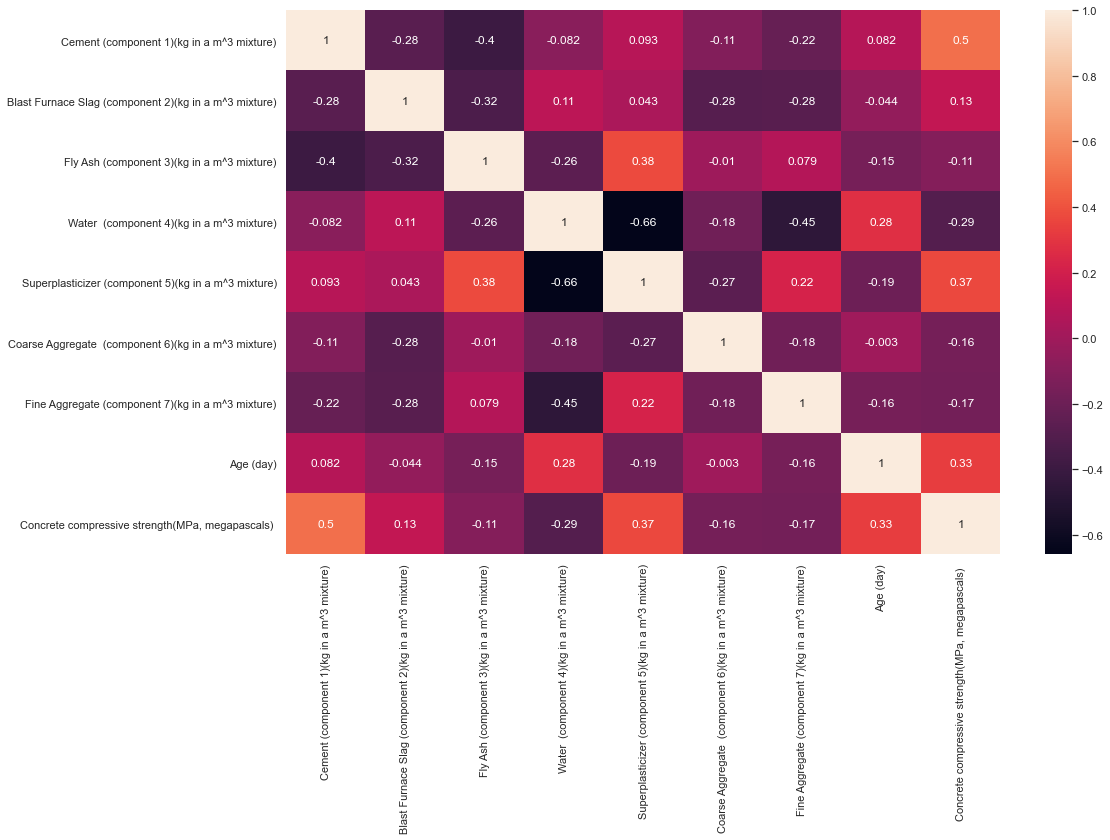

In [5]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(dataset.corr(),annot= True)
plt.show()
# Saving
sns_plot.figure.savefig("Heat Map.png")

In [6]:
dataset = dataset.drop('Fly Ash (component 3)(kg in a m^3 mixture)', axis=1)

In [7]:
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state =2900 )
X_train

array([[ 236.  ,    0.  ,  194.  , ...,  968.  ,  885.  ,    3.  ],
       [ 425.  ,  106.3 ,  151.4 , ...,  936.  ,  803.7 ,    3.  ],
       [ 214.9 ,   53.8 ,  155.63, ..., 1014.3 ,  780.58,  100.  ],
       ...,
       [ 136.  ,  162.  ,  172.  , ...,  923.  ,  764.  ,   28.  ],
       [ 202.  ,   11.  ,  206.  , ...,  942.  ,  801.  ,   56.  ],
       [ 238.05,    0.  ,  186.66, ...,  949.91,  847.01,  100.  ]])

**Decisison Tree**

In [9]:
# function to perform training with entropy
clf = DecisionTreeRegressor( random_state =3, max_depth =20)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=3)

In [10]:
y_pred_en = clf.predict(X_test)
score = r2_score(y_pred_en, y_test)
score*100

89.17099048631995